<h2> Nauczanie maszynowe/Ćwiczenia3

# Maszyna wektorów nośnych (SVM)

In [ ]:
from sklearn import datasets
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h4> Liniowe SVM

Cel: Rozdzielenie danych za pomocą hiperpłaszczyny (w podstawowej wersji na 2 grupy; można uogólnić)


- Chcemy zmaksymalizować marignes równy $\frac{2}{||w||}$ 

- W podstawowej wersji zadanie to sprowadza się do minimalizacji $J(w)=\frac{1}{2}||w||^2$ przy warunkach $y_i(w^Tx_i+w_0)\geq 1$

- W praktyce idealna separowalność liniowa nie zachodzi, musimy zatem dopuścić pewne niezgodnośći, wprowadzamy dodatkowe zmienne do rozwiązywanego problemu ($\eta_i$), który w tym momencie sprowadza się do minimalizacji $J(w)=\frac{1}{2}||w||^2+C\sum_{i}\eta_i$ przy warunkach $y_i(w^Tx_i+w_0)\geq 1 - \eta_i$

Uwaga:
- $\eta_i \in (0,1)$ to próbka jest po drobrej stronie ale wyszła poza margines
- $\eta_i>1$, to próbka jest po złej stronie

To nam narzuca interpretację $C$.Jaka ona jest?

In [ ]:
#rozwazam dane iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

#standaryzacja
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1., random_state=0)
svm.fit(X_train_std, y_train);

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


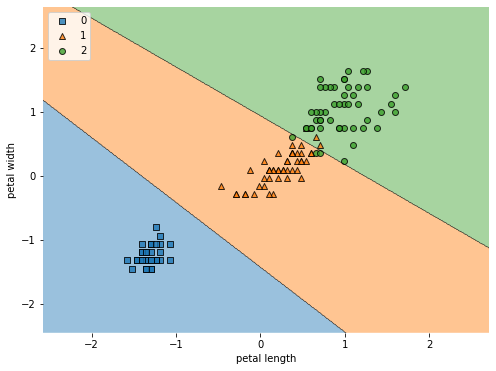

In [ ]:
plt.figure(figsize=(8, 6))

X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [ ]:
svm.score(X_test_std, y_test) #dokladnosc

0.9777777777777777

<h4> Zadanie1: Rozważ poniższe dane. Zastosuj algorytm SVM dla różnych parametrów C: 0.01, 10. Zwizualizuj i skomentuj w kilku zdaniach otzymane wyniki.

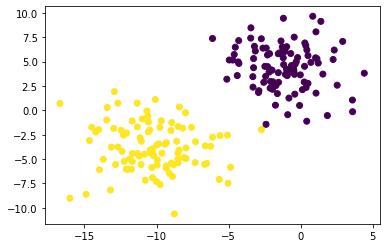

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, random_state=1, n_features=2, centers = 2, cluster_std = 2.4)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
#standaryzacja
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=0.01, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=0.01, kernel='linear', random_state=0)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


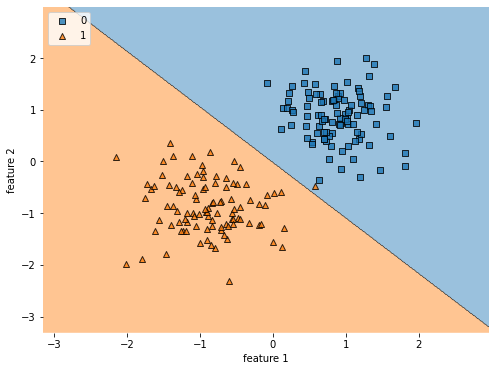

In [ ]:
plt.figure(figsize=(8, 6))

X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.show()
a = plt

In [ ]:
svm.score(X_test_std, y_test) #dokladnosc

1.0

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=10, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=10, kernel='linear', random_state=0)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


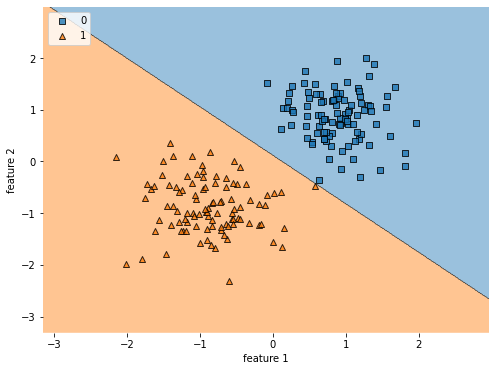

In [ ]:
plt.figure(figsize=(8, 6))

X_all = np.vstack( (X_train_std, X_test_std) )
y_all = np.hstack( (y_train, y_test) )
plot_decision_regions(X=X_all, y=y_all, clf=svm)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='upper left')
plt.show()

In [ ]:
svm.score(X_test_std, y_test) #dokladnosc

1.0

Parametr C odpowiedzialny jest za wysokość kary nieprawidłowej klasyfikacji dla modelu. 0.01 odpowiada bardzo małej karze i możemy zobaczyć, że jeden z pomarańczowych trójkątów został źle przyporządkowany. Z kolei 10 to wysoka wartość tego parametru  i dla danych powyżej mamy prawidłową klasyfikację. W wyborze optymalnej wartości C należy być świadomym, że zbyt wysokie C zwiększa uprzedzenie naszego modelu w stosunku do nowych danych, natomiast zbyt małe C może nie być przygotowane na większą wariancję nowych danych w porównaniu do dotychczasowych (C - wyznaczanie wielkości marginesu).

<h4> Kernel

Dane często nie są separowalne liniowo, jednak klasyfiaktory liniowe dalej mogą działać! Wystarczy zastosować odpowiednie przekształcenie danych (kernel)

Przykładowa funkcja, jedna z najczęsciej używanych to RBF, zdefiniowana jest jako $K(x,y) = -\exp(-\frac{1}{2\sigma^2} ||x-y||^2)= \exp(-\gamma ||x-y||^2)$

Inne: wielomianowy, sigmoidalny,...

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


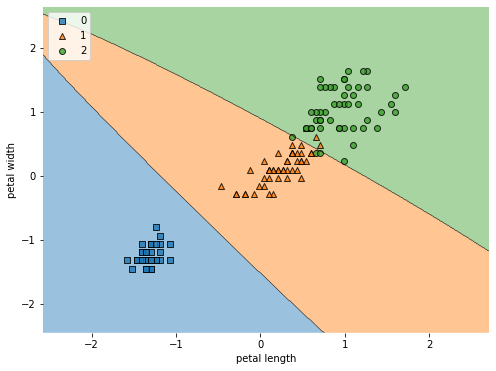

In [ ]:
svm = SVC(kernel='rbf', C=1., gamma=0.1, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

<h4> Zadanie2: Przetestować inne wartości $\gamma$ (np. 10, 50) dla danych wyżej. Skomentować wyniki w konkteście definicji parametru $\gamma$.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


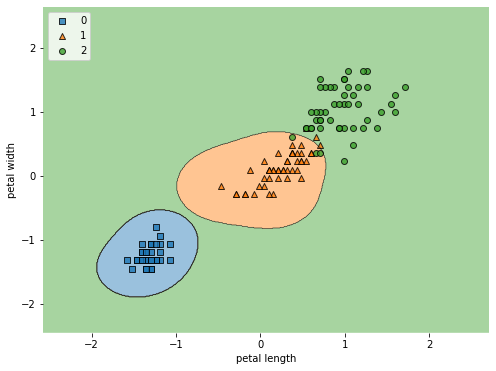

In [ ]:
svm = SVC(kernel='rbf', C=1., gamma=5, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


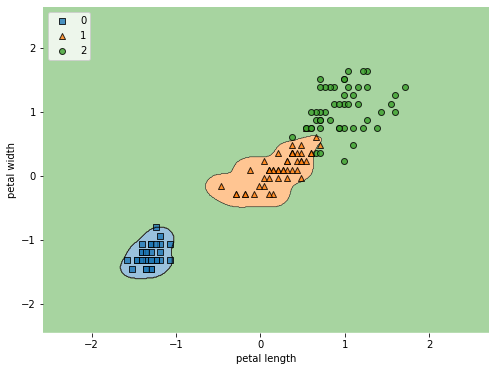

In [ ]:
svm = SVC(kernel='rbf', C=1., gamma=35, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_all , y=y_all , clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Większa wartość parametru Gamma sprawia, że model zachowuje się co raz lepiej na danych testowych. Przy tak dużych wartościach tego parametru możemy się jednak spodziewać, że model nie poradzi sobie z nowymi danymi. Parametrem gamma możemy kontrolować stopień przetrenowania modelu - może być on iterpretowany jako stopień wpływu zbioru testowego na wyznaczanie marginesu modelu. 


<h3> Optymalizatory

Jak widzieliśmy na poprzednich i tych zajęciach, różne metody często wykorzystują różne funkcje kosztu. W tym podrozdziale zaimplementujemy w pytorch różne metody optymalizacji, zaczynając już od znanej metody spadku gradientu. Poniższe materiały pochodzą od grupy pracowników WMiI.

Warto poczytać: https://ruder.io/optimizing-gradient-descent/index.html

In [92]:
import torch
from utils import visualize_optimizer
from checker import test_optimizer

Definiujemy klasę rodzic dla kolejnych metod.

In [93]:
from typing import List

class Optimizer:
    """Base class for each optimizer"""
    
    def __init__(self, initial_params):
        # store model weights
        self.params = initial_params
    
    def step(self):
        """Updates the weights stored in self.params"""
        raise NotImplementedError()
         
    def zero_grad(self):
        """Torch accumulates gradients, so we need to clear them after every update"""
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

### Metoda spadku gradientu

<font size="+2"> $$\theta_{t+1} = \theta_t - \eta \nabla_\theta \mathcal{L}(\theta_t)$$  </font><br>

In [94]:
class GradientDescent(Optimizer):
    
    def __init__(self, initial_params: List[torch.tensor], learning_rate):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
    
    @torch.no_grad()
    def step(self):
        for param in self.params:
            # Please note that it's important to change the parameters in-place (-=) so the original tensors are modified
            param -= self.learning_rate * param.grad


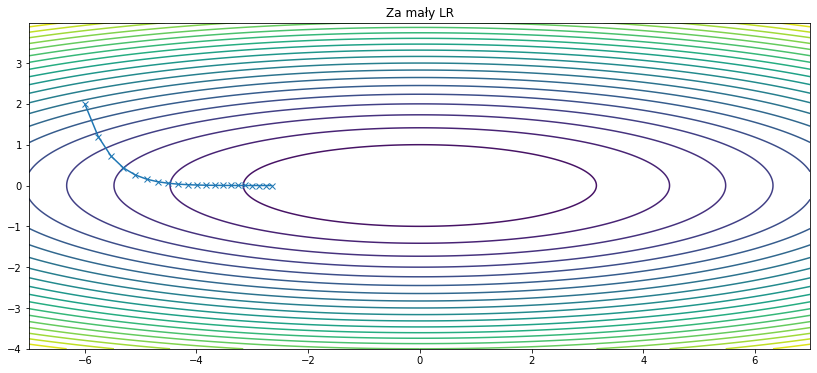

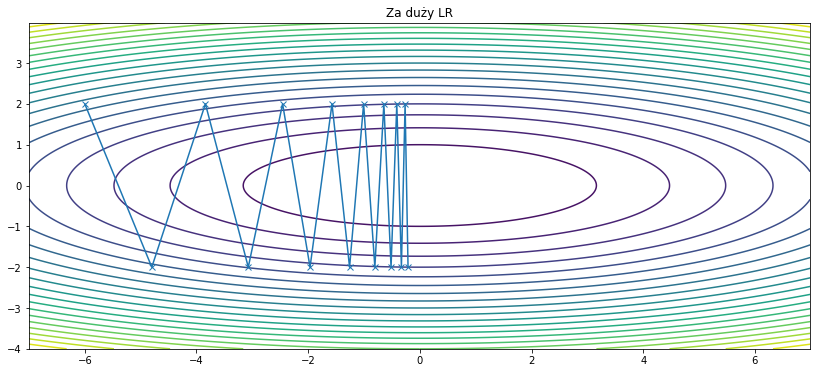

In [95]:
visualize_optimizer(GradientDescent, n_steps=20, learning_rate=0.1, title='Za mały LR')
visualize_optimizer(GradientDescent, n_steps=15, learning_rate=0.5, title='Za duży LR')

### Momentum
Hiperparametry:
* $\eta$ - Learning Rate (typowe wartości: od 0.001 do 0.01)
* $\gamma$ - Momentum (zawsze < 1, typowo 0.9)

Zmiany dokonywane są na podstawie wektora "pędu" (ang. *momentum*) $\Delta$, który rośnie jeżeli dokonujemy zmian w tym samym kierunku.

<font size="+2"> $$ \Delta_{t+1} = \gamma  \Delta_{t} + \eta \nabla_\theta \mathcal{L}(\theta_t) $$ </font><br>
<font size="+2"> $$ \theta_{t+1} = \theta_{t} - \Delta_{t+1} $$ </font>

#### Uwagi
* $\Delta_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.

<h4> Zadanie3: Uzupełnij definicję poniżej klasy.

In [133]:
class Momentum(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma):
        super().__init__(initial_params)
        
        self.learning_rate = learning_rate
        self.gamma = gamma
        
        self.deltas = []
        
        for param in self.params:
          self.deltas.append(torch.zeros_like(param))
              
    @torch.no_grad()
    def step(self):
        ix = 0
        for param in self.params:
          self.deltas[ix] = self.deltas[ix] * self.gamma + self.learning_rate * param.grad  
          param -= self.deltas[ix]
          ix += 1

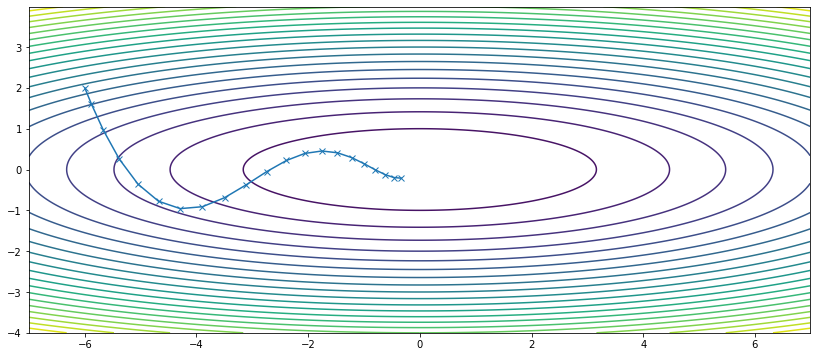

In [134]:
visualize_optimizer(Momentum, n_steps=20, learning_rate=0.05, gamma=0.8)

### Adagrad  
Hiperparametry:
* $\eta$ - Learning Rate (typowe wartości: od 0.001 do 0.01)
* $\epsilon$ - Dodawany do mianownika w celu uniknięcia dzielenia przez 0 (typowo $10^{-8}$)

W każdym korku adaptujemy stałą uczenia $\eta$ dla każdego z wymiarów wag na podstawie sumy kwadratów dotychczasowych gradientów.

<font size="+2"> $$ \displaystyle  G_t = \sum_{i = 1}^{t} \big(\nabla_\theta \mathcal{L}(\theta_i)\big)^2 $$ </font>

<font size="+2"> $$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \odot \nabla_\theta \mathcal{L}(\theta_t) $$ </font>



<font size="+0"> gdzie $G_t$ to suma kwadratów gradientów $\nabla_\theta \mathcal{L}(\theta_i)^2$ dla kroków $i = 1, .., t$ </font>

##### Uwagi
* $G_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $\odot$ to mnożenie *element-wise*.
* podnoszenie gradientu do kwadratu jest robione *element-wise*.

<h4> Zadanie4: Uzupełnij definicję poniżej klasy.

In [128]:
class Adagrad(Optimizer):
    
    def __init__(self, initial_params, learning_rate, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.G = []
        
        for param in self.params:
          self.G.append(torch.zeros_like(param))


    @torch.no_grad()
    def step(self):
      ix = 0
      for param in self.params: 
        self.G[ix] += torch.mul(param.grad, param.grad)  
        param -= torch.mul(torch.div(self.learning_rate, torch.sqrt(self.G[ix] + 1e-9)), param.grad)
        ix +=1 


In [129]:
test_optimizer(Adagrad)

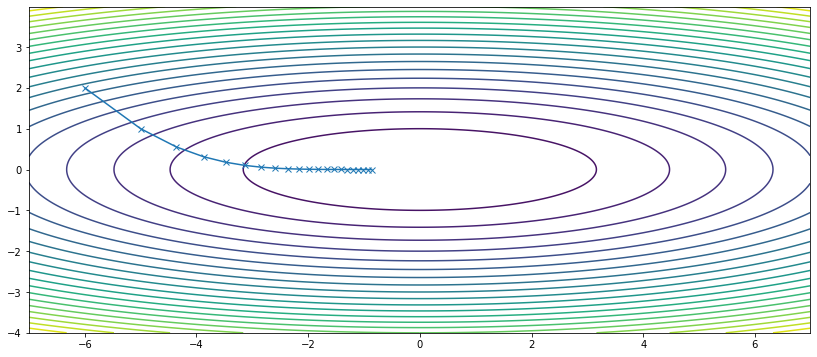

In [130]:
visualize_optimizer(Adagrad, n_steps=20, learning_rate=1.0, epsilon=1e-8)

### RMSProp  
Hiperparametry:
* $\eta$ - Learning Rate (typowe wartości: od 0.001 do 0.01)
* $\gamma$ - Współczynnik średniej kroczącej (typowo 0.9)
* $\epsilon$ - Dodawany do mianownika w celu uniknięcia dzielenia przez 0 (typowo $10^{-8}$)

Analogicznie dla algorytmu *Adagrad* adaptujemy stałą uczenia, lecz tym razem zamiast sumy, robimy to średnią kroczącą ze współczynnikiem $\gamma$.

<font size="+2"> $$ H_{t+1} = \gamma H_{t} + (1 - \gamma) \big( \nabla_\theta \mathcal{L}(\theta_t)\big)^2 $$ </font>

<font size="+2"> $$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{H_{t+1} + \epsilon}} \odot \nabla_\theta \mathcal{L}(\theta_t) $$ </font>



gdzie $H_t$ to średnia krocząca kwadratów gradientów $(\nabla_\theta \mathcal{L}(\theta_t))^2$ z kroków $0, 1, ..., t$ ze współczynnikiem $\gamma$.

#### Uwagi
* $H_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $\odot$ to mnożenie *element-wise*.
* podnoszenie gradientu do kwadratu jest robione *element-wise*.

<h4> Zadanie5: Uzupełnij definicję poniżej klasy.

In [138]:
class RMSProp(Optimizer):
    
    def __init__(self, initial_params, learning_rate, gamma, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon
        
        self.H = []
        
        for param in self.params:
          self.H.append(torch.zeros_like(param))
        
    @torch.no_grad()
    def step(self):
      ix = 0
      for param in self.params: 
        self.H[ix] = torch.mul(self.gamma,self.H[ix]) + torch.mul((1 - self.gamma), torch.mul(param.grad, param.grad))
        param -= torch.mul(torch.div(self.learning_rate, torch.sqrt(self.H[ix] + 1e-9)), param.grad)
        ix += 1


In [139]:
test_optimizer(RMSProp)

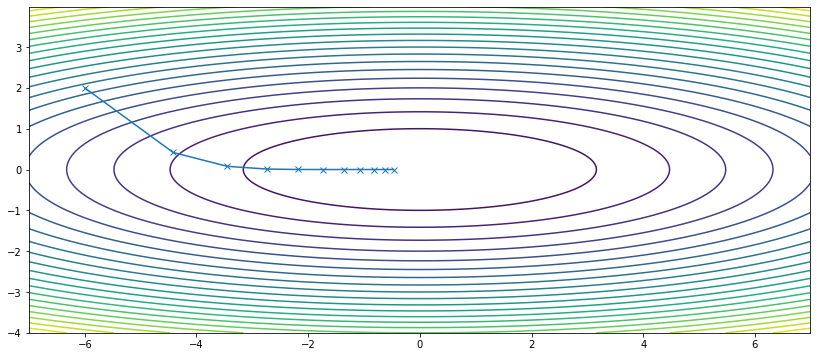

In [140]:
visualize_optimizer(RMSProp, n_steps=10, learning_rate=0.5, gamma=0.9, epsilon=1e-8)

### Adadelta  
Hiperparametry:
* $\gamma$ - Współczynnik średniej kroczącej (typowo 0.9)
* $\epsilon$ - Dodawany do mianownika w celu uniknięcia dzielenia przez 0 oraz rozpoczęcia uczenia (typowo $10^{-8}$ do $10^{-2}$)

Eliminujemy stałą uczenia $\eta$ i sprawiamy, że "prędkość" poprawek jest podobna do faktycznych poprawek uzależniając krok uczenia od średniej kroczącej poprzednich poprawek.

<font size="+2"> $$ H_{t+1} = \gamma H_{t} + (1 - \gamma) \big( \nabla_\theta \mathcal{L}(\theta_t)\big)^2 $$ </font>

<font size="+2"> $$ \Delta_{t+1} = \frac{\sqrt{D_{t} + \epsilon}}{\sqrt{H_{t+1} + \epsilon}} \odot \nabla_\theta \mathcal{L}(\theta_t) $$ </font>

<font size="+2"> $$ \theta_{t+1} = \theta_t - \Delta_{t+1} $$ </font>

<font size="+2"> $$ D_{t+1} = \gamma D_{t} + (1 - \gamma) \Delta_{t+1}^2 $$ </font>

#### Uwagi:
* $H_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $D_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $\odot$ to mnożenie *element-wise*.
* podnoszenie gradientu do kwadratu jest robione *element-wise*.

<h4> Zadanie6: Uzupełnij definicję poniżej klasy.

In [184]:
class Adadelta(Optimizer):
    def __init__(self, initial_params, gamma, epsilon):
        super().__init__(initial_params)
        self.gamma = gamma
        self.epsilon = epsilon

        self.H = []
        self.D = []
        
        for param in self.params:
          self.H.append(torch.zeros_like(param))
          self.D.append(torch.zeros_like(param))


        
    @torch.no_grad()
    def step(self):
      ix = 0
      for param in self.params: 
        self.H[ix] = torch.add(torch.mul(self.gamma, self.H[ix]) \
                               , torch.mul((1 - self.gamma), torch.pow(param.grad , 2)))
        delta = torch.mul(torch.div(torch.sqrt(self.D[ix] + self.epsilon), \
                                     torch.sqrt(self.H[ix] + self.epsilon)), param.grad)
        param -= delta
        self.D[ix] = torch.add(torch.mul(self.gamma, self.D[ix]), \
                               torch.mul(1 - self.gamma, torch.pow(delta , 2)))
        ix += 1 

In [185]:
test_optimizer(Adadelta)

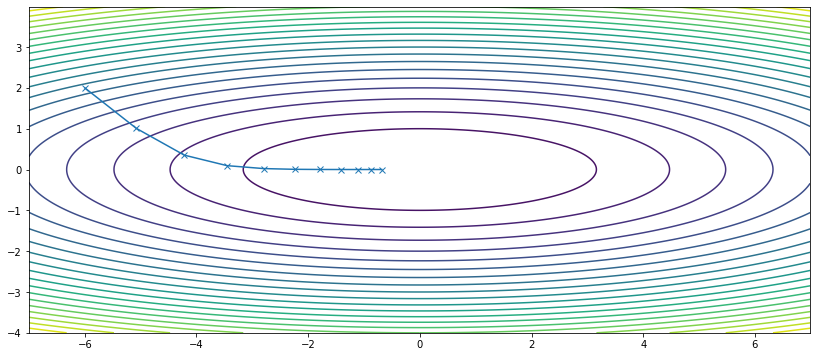

In [187]:
visualize_optimizer(Adadelta, n_steps=10, gamma=0.9, epsilon=1e-1)

### Adam 

Hiperparametry:
* $\eta$ - Learning Rate (typowo 0.001)
* $\beta_1$ - współczynnik średniej kroczącej pierwszego momentu (typowo 0.9)
* $\beta_2$ - współczynnik średniej kroczącej drugiego momentu (typowo 0.999)
* $\epsilon$ - zapobiega dzieleniu przez zero (typowo $10^{-8}$)

Adaptujemy gradient dwiema średnimi kroczącymi, pierwszego $m$ i drugiego $v$ momentu. Na początku uczenia te średnie są bardzo zbiasowane do 0, stąd wprowadzane są poprawka $\hat{m}$ i $\hat{v}$, im dalej w procesie uczenia, tym te poprawki wprowadzają mniejsze zmiany.  

<font size="+2"> $$ m_{t+1} = \beta_1 m_{t} + (1 - \beta_1)  \nabla_\theta \mathcal{L}(\theta_t) $$ </font>
<font size="+2"> $$ v_{t+1} = \beta_2 v_{t} + (1 - \beta_2)  \big( \nabla_\theta \mathcal{L}(\theta_t) \big)^2 $$ </font>
<br>
<font size="+2"> $$  \hat{m} = \frac{m_{t+1}}{1 - \beta_1^{(t+1)}} $$ </font><br>
<font size="+2"> $$  \hat{v} = \frac{v_{t+1}}{1 - \beta_2^{(t+1)}} $$ </font>
<br>
<font size="+2"> $$ \theta_{t+1} = \theta_t - \eta \frac{\hat{m}}{\sqrt{\hat{v}} + \epsilon} $$ </font>

#### Uwagi
* $m_0 = \mathbf{0}$, wymiar taki sam jak $\theta$.
* $v_0 = \mathbf{0}$, wymiar taki sam jak $\theta$. 
* $\beta_1^{(t+1)}$ oraz $\beta_2^{(t+1)}$ to potęgowania.
* podnoszenie gradientu do kwadratu jest robione *element-wise*.


<h4> Zadanie7: Uzupełnij definicję poniżej klasy.

In [201]:
class Adam(Optimizer):
   
    def __init__(self, initial_params, learning_rate, beta1, beta2, epsilon):
        super().__init__(initial_params)
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.a = 0 
        
        self.m = []
        self.v = []
        
        for param in self.params:
          self.m.append(torch.zeros_like(param))
          self.v.append(torch.zeros_like(param))

    @torch.no_grad()
    def step(self,):
      ix = 0
      for param in self.params: 
        self.m[ix] = self.beta1 * self.m[ix] + torch.mul((1 - self.beta1), param.grad)
        self.v[ix] = self.beta2 * self.v[ix] + torch.mul((1 - self.beta2), torch.pow(param.grad,2))

        m = torch.div( self.m[ix] , 1 - self.beta1**(1 + self.a))
        v = torch.div( self.v[ix] , 1 - self.beta2**(1 + self.a))

        param -= torch.mul(self.learning_rate , torch.div(m, torch.sqrt(v) + self.epsilon))

        ix += 1 
      self.a += 1 


In [202]:
test_optimizer(Adam)

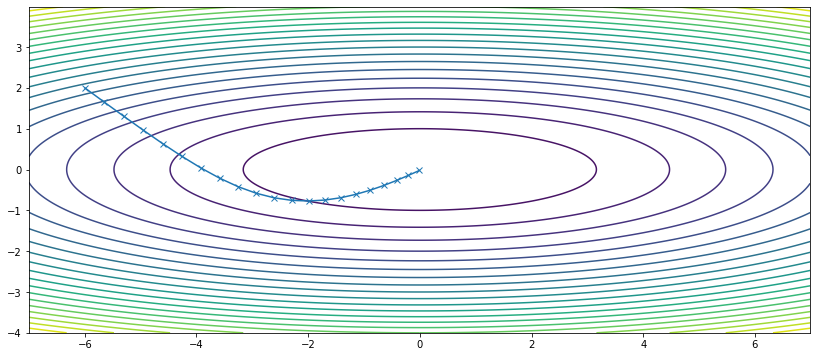

In [203]:
visualize_optimizer(Adam, n_steps=20, learning_rate=0.35, beta1=0.9, beta2=0.999, epsilon=1e-8)

Dodałbym własny optimizer, ale checker.py chyba to blokuje 😭.